### Mouse pose classification

In [26]:
import os
import pandas as pd
import numpy as np
from platform import python_version
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

In [5]:
print("current python version:", python_version())

current python version: 3.7.9


In [6]:
data = pd.read_csv("../data_all/mouse_body_pos.csv")
data.head()

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
0,img_0001.jpg,265.0,85.0,382.0,95.0,280.0,198.0,342.0,199.0,296.0,276.0
1,img_0002.jpg,248.0,7.0,286.0,24.0,NaN,NaN,206.0,42.0,124.0,41.0
2,img_0003.jpg,265.0,85.0,381.0,96.0,276.0,197.0,338.0,199.0,291.0,276.0
3,img_0004.jpg,156.0,49.0,NaN,NaN,215.0,73.0,NaN,NaN,279.0,83.0
4,img_0005.jpg,170.0,99.0,230.0,99.0,192.0,143.0,234.0,147.0,227.0,183.0


In [39]:
fr_num = 946

data_path = '../data_all/mouse_pos'
img_path = os.path.join(data_path,"img_0"+str(fr_num)+'.jpg')
print(img_path)

../data_all/mouse_pos/img_0946.jpg


In [28]:
single_df=data.iloc[[fr_num-1]]
single_df

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
945,img_0946.jpg,210.0,97.0,334.0,119.0,215.0,150.0,286.0,158.0,222.0,183.0


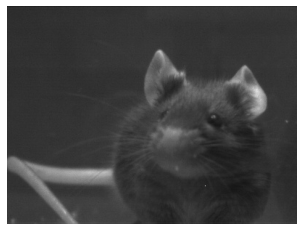

In [162]:
img=cv2.imread(img_path) 
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

(-0.5, 399.5, 299.5, -0.5)

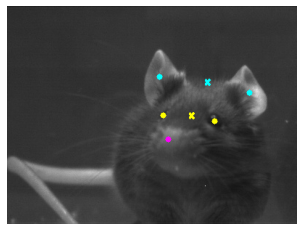

In [177]:
# Retrieve the coordinates of the body parts

ear_rx, ear_ry = int(single_df[['ear_r_x']].squeeze()), int(single_df[['ear_r_y']].squeeze())
ear_lx, ear_ly = int(single_df[['ear_l_x']].squeeze()), int(single_df[['ear_l_y']].squeeze())
eye_rx, eye_ry = int(single_df[['eye_r_x']].squeeze()), int(single_df[['eye_r_y']].squeeze())
eye_lx, eye_ly = int(single_df[['eye_l_x']].squeeze()), int(single_df[['eye_l_y']].squeeze())
n_x, n_y = int(single_df[['nose_x']].squeeze()), int(single_df[['nose_y']].squeeze())

# calculate the centers
ear_cx, ear_cy = int((ear_rx+ear_lx)/2), int((ear_ry+ear_ly)/2)
eye_cx, eye_cy = int((eye_rx+eye_lx)/2), int((eye_ry+eye_ly)/2)

radius = 1
cyan=[0,255,255]
yellow=[255,255,0]
magenta=[255,0,255]
font=cv2.FONT_HERSHEY_SIMPLEX
font_scale=0.5

img=cv2.imread(img_path) 
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_marked=img

# plot the detected body parts
img_marked=cv2.circle(img_marked, (ear_rx, ear_ry), radius=radius, color=cyan, thickness=5)
img_marked=cv2.circle(img_marked, (ear_lx, ear_ly), radius=radius, color=cyan, thickness=5)
img_marked=cv2.circle(img_marked, (eye_rx, eye_ry), radius=radius, color=yellow, thickness=5)
img_marked=cv2.circle(img_marked, (eye_lx, eye_ly), radius=radius, color=yellow, thickness=5)
img_marked=cv2.circle(img_marked, (n_x, n_y), radius=radius, color=magenta, thickness=5)

# mark the center position
img_marked=cv2.putText(img_marked, 'x', (ear_cx, ear_cy), font, font_scale, color=cyan, thickness=2)
img_marked=cv2.putText(img_marked, 'x', (eye_cx, eye_cy), font, font_scale, color=yellow, thickness=2)

plt.imshow(img_marked)
plt.axis('off')

#### Case differenciation

Consider 9 cases, and differentiate the pose first with x-coords (pan) and then with y-coords (tilt)

In [203]:
# TO DEFINE the FRONT in terms of x-coords: 

# initial check
if ear_rx < eye_rx & eye_rx < n_x:
    print('right side clear')
if ear_lx > eye_lx & eye_lx > n_x:
    print('left side clear')    
    
# Hypothesis1: critical part is the relation between the nose and eyes
ran_eyes=abs(eye_lx-eye_rx) # distance between the eyes
n_r_dev_raw=abs(eye_rx-n_x)
n_l_dev_raw=abs(eye_lx-n_x)
assert n_r_dev_raw+n_l_dev_raw == ran_eyes

# how much the nose deviates: 
n_r_dev=n_r_dev_raw/ran_eyes #if smaller than 0.5 -> turning to the right
n_l_dev=n_l_dev_raw/ran_eyes # if smaller than 0.5 -> turning to the left

# define the front face when n_r_dev and n_l_dev is larger than 0.25 
# to be a front face, those numbers should be between 0.5 w.r.t. the center
if (n_r_dev >0.25) & (n_l_dev>0.25):
    print('front face in terms of x-coords') # (1)
elif n_r_dev >0.25:
    print('turning to the left') # (2)
else:
    print('turning to the right') #(3)


right side clear
left side clear
turning to the right


For above (1),(2), and (3) cases, differentiate cases again w.r.t. y-coords.
Let's take a look another image.

In [265]:
# fr_num1 = 902
# fr_num1 = 930
fr_num1 = 927

img_path1 = os.path.join(data_path,"img_0"+str(fr_num1)+'.jpg')
print(img_path1)

../data_all/mouse_pos/img_0927.jpg


In [266]:
single_df=data.iloc[[fr_num1-1]] 
single_df

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
926,img_0927.jpg,214.0,105.0,341.0,125.0,222.0,144.0,290.0,152.0,224.0,172.0


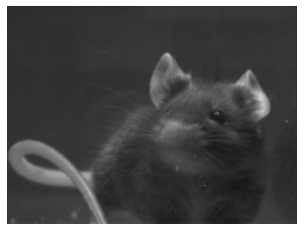

In [267]:
img1=cv2.imread(img_path1) 
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')
plt.show()

(-0.5, 399.5, 299.5, -0.5)

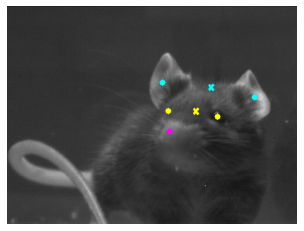

In [268]:
# Retrieve the coordinates of the body parts

ear_rx, ear_ry = int(single_df[['ear_r_x']].squeeze()), int(single_df[['ear_r_y']].squeeze())
ear_lx, ear_ly = int(single_df[['ear_l_x']].squeeze()), int(single_df[['ear_l_y']].squeeze())
eye_rx, eye_ry = int(single_df[['eye_r_x']].squeeze()), int(single_df[['eye_r_y']].squeeze())
eye_lx, eye_ly = int(single_df[['eye_l_x']].squeeze()), int(single_df[['eye_l_y']].squeeze())
n_x, n_y = int(single_df[['nose_x']].squeeze()), int(single_df[['nose_y']].squeeze())

# calculate the centers
ear_cx, ear_cy = int((ear_rx+ear_lx)/2), int((ear_ry+ear_ly)/2)
eye_cx, eye_cy = int((eye_rx+eye_lx)/2), int((eye_ry+eye_ly)/2)

img1=cv2.imread(img_path1) 
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_marked=img1

# plot the detected body parts
img_marked=cv2.circle(img_marked, (ear_rx, ear_ry), radius=radius, color=cyan, thickness=5)
img_marked=cv2.circle(img_marked, (ear_lx, ear_ly), radius=radius, color=cyan, thickness=5)
img_marked=cv2.circle(img_marked, (eye_rx, eye_ry), radius=radius, color=yellow, thickness=5)
img_marked=cv2.circle(img_marked, (eye_lx, eye_ly), radius=radius, color=yellow, thickness=5)
img_marked=cv2.circle(img_marked, (n_x, n_y), radius=radius, color=magenta, thickness=5)

# mark the center position
img_marked=cv2.putText(img_marked, 'x', (ear_cx, ear_cy), font, font_scale, color=cyan, thickness=2)
img_marked=cv2.putText(img_marked, 'x', (eye_cx, eye_cy), font, font_scale, color=yellow, thickness=2)

plt.imshow(img_marked)
plt.axis('off')

In [269]:
ear_cy, eye_cy

(115, 148)

In [270]:
# TO DEFINE the FRONT in terms of y-coords: 
# initial check
assert (ear_cy < eye_cy) & (eye_cy < n_y) # consider when either is NaN so that there's no cy coords

# Hypothesis2: comparison between the distances (nose to eyes, eyes to ears) may imply important info.
eye2ear_raw=abs(eye_cy-ear_cy)
eye2n_raw=abs(eye_cy-n_y)
ear2n_raw=abs(ear_cy-n_y)
assert eye2ear_raw+eye2n_raw == ear2n_raw

# which is larger and how much is the difference?
eye2ear_pro=round(eye2ear_raw/ear2n_raw,2)
eye2n_pro=round(eye2n_raw/ear2n_raw,2)

(eye2ear_pro, eye2n_pro)

# well, the proportion does not change much, because eye2ear_pro is normally larger than eye2n_pro
# even it looks like the mouse looks down or up

# # define the front face when n_r_dev and n_l_dev is larger than 0.25 
# # to be a front face, those numbers should be between 0.5 w.r.t. the center
# if (n_r_dev >0.25) & (n_l_dev>0.25):
#     print('front face in terms of x-coords') # (1)
# elif n_r_dev >0.25:
#     print('turning to the left') # (2)
# else:
#     print('turning to the right') #(3)

(0.58, 0.42)

In [252]:
abs(ear_cy-n_y)

101

In [226]:
round(eye2ear_pro,2)

0.56

Misc: 

* no nose but all others exist? 1078
* check NaN value problem: not to squeeze it
* see 1768, to check the tilt